Name: Namrata Bhorade

Class: BE COMPS

Batch: A

UID: 2018130004

Roll No.: 03

# CEEL 82B, Data Science, 2022
# Lab 5: Measuring the Performance of Model


**Objective**: Based on competition available at Kaggle, https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description,  revolving around predicting the house price through regression techniques. your objective is to build a regression model and measure the performance of the  model in terms of accuracy, recall, sensitivity, specificity, ROC curves, precision recall curves and loss function for regression.

This notebook elaborates the steps involved in performing regression analysis on House Prices Prediction dataset. It consists of the evaluation baseline model without any data preprocessing and then the final linear regression model trained on the dataset preprocessed using necessary techniques. It also presents the performance of Random Forest Regressor model an K Neighnors Regressor model. The current rank at the competition is 1887 with score 0.14599

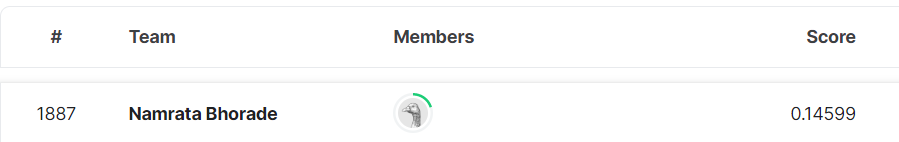

Link to kaggle profile - https://www.kaggle.com/namratabhorade/competitions

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold

from sklearn.metrics import accuracy_score, mean_squared_error, roc_curve, roc_auc_score, auc, r2_score

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
    
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor

from itertools import cycle

from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/DS-Lab/Lab/Exp5/train.csv')

In [ ]:
print("Size of training data: ", train_df.shape)

Size of training data:  (1460, 81)


In [ ]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


There are total 81 features in training set and 1460 data entries.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Part 1 - Baseline Model

The baseline model is trained without performing any data pre-processing.

## Handling Missing Values

In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


This table shows the actual and percent null values in each column. We can see that PoolQC has almost 99% values as null followed by MiscFeature, Alley, etc.

## Removing Null Values

For baseline model, all the columns having null values are removed.

In [ ]:
train_df = train_df.dropna(axis=1)
train_df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


## Dividing columns into categorical and numerical columns

In [ ]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = []
categorical_columns = []
features = train_df.columns.values.tolist()
for col in features:
    if train_df[col].dtype in numerics:
        numerical_columns.append(col)
    else:
        categorical_columns.append(col)
print("Numerical Columns: ", numerical_columns)

print("\nCategorical Columns: ", categorical_columns)

Numerical Columns:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Categorical Columns:  ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


## Removing Categorical Columns

For baseline model, all categorical columns are removed.

In [ ]:
train_df = train_df.drop(columns=categorical_columns)

In [ ]:
train_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


## Data Partition (80% for training and 20% for testing)


In [ ]:
# Independent attributes
X = train_df.drop(columns='SalePrice')

# Dependent attributes
Y = train_df[['SalePrice']]

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=45)

## Building Model

In [ ]:
# Create linear regression object
model_0 = LinearRegression()
model_0.fit(X_train, y_train)

LinearRegression()

## Summarize the model.

In [ ]:
model_0.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

## Prediction

In [ ]:
y_pred = model_0.predict(X_test)

## Evaluate the model

In [ ]:
linear_regression_score = model_0.score(X_test, y_test)
print("Score of Baseline Linear Regression Model: ", round(linear_regression_score, 5))

Score of Baseline Linear Regression Model:  0.8533


In [ ]:
print("Mean squared error: ", round(mean_squared_error(y_test, y_pred), 5))

Mean squared error:  949218462.58185


The regression score for baseline model in 0.8533

# Part 2

In [ ]:
house_data = pd.read_csv('/content/drive/MyDrive/DS-Lab/Lab/Exp5/train.csv')

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/DS-Lab/Lab/Exp5/test.csv')

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Handling Missing Values

In [ ]:
# count of null values in each column
total = house_data.isnull().sum().sort_values(ascending=False)
percent = (house_data.isnull().sum()*100/house_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


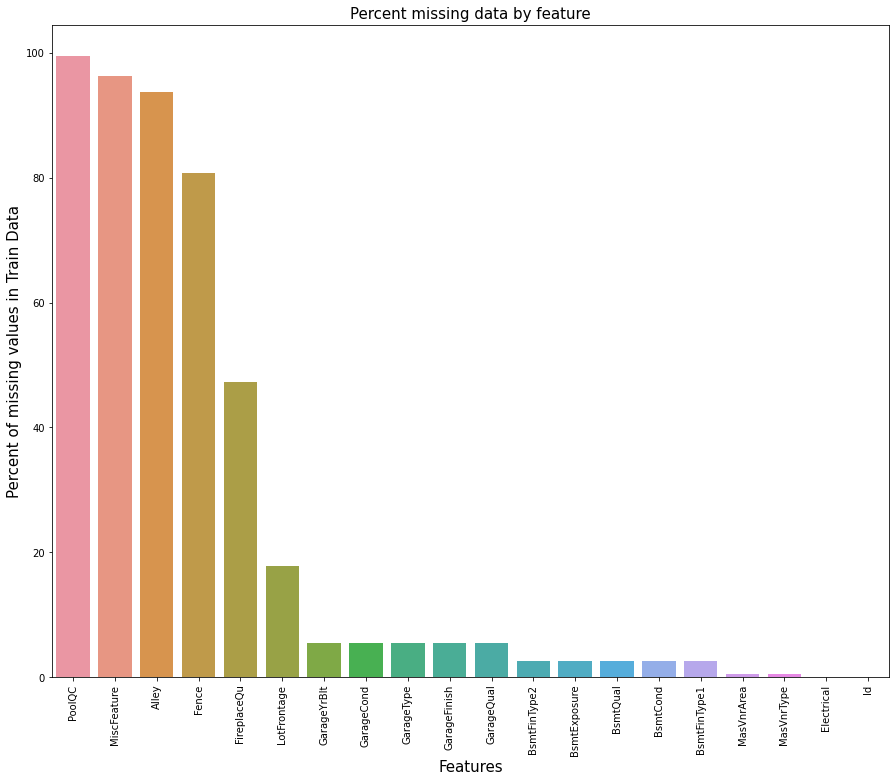

In [ ]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index[:20], y=missing_data['Percent'][:20])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values in Train Data', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

The above graph shows that PoolQc, MiscFeature, Alley columns have more than 80% values as null.

In [ ]:
# count of null values in each column
test_total = test_df.isnull().sum().sort_values(ascending=False)
test_percent = (test_df.isnull().sum()*100/test_df.isnull().count()).sort_values(ascending=False)
test_missing_data = pd.concat([test_total, test_percent], axis=1, keys=['Total', 'Percent'])
test_missing_data.head(20)

,Total,Percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageYrBlt,78,5.346127
GarageQual,78,5.346127
GarageFinish,78,5.346127
GarageCond,78,5.346127


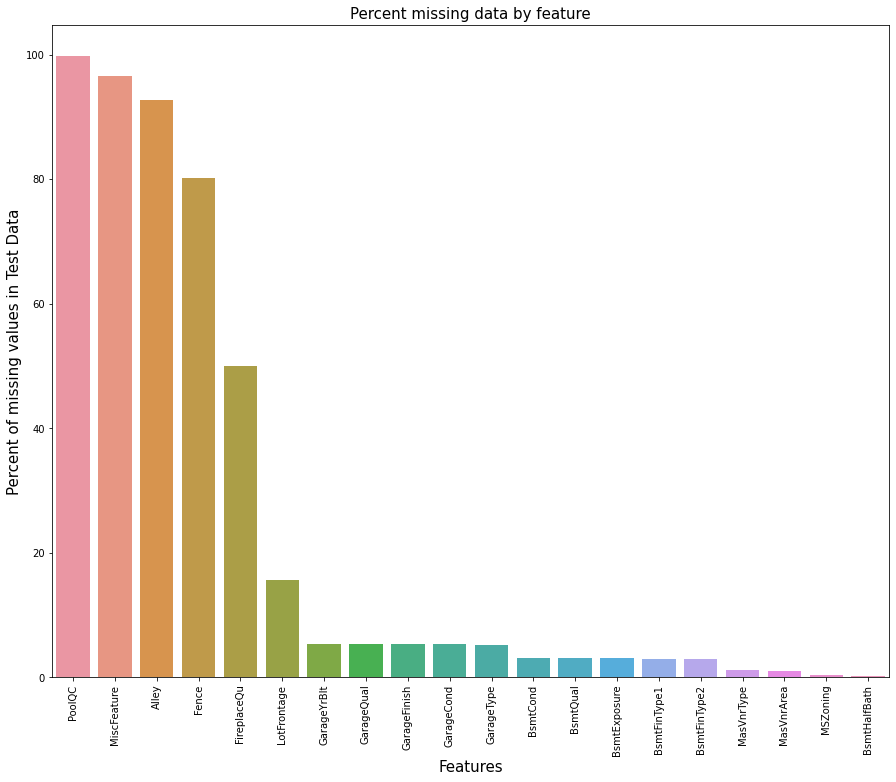

In [ ]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=test_missing_data.index[:20], y=test_missing_data['Percent'][:20])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values in Test Data', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

## Imputing Null Values based on Data Description

PoolQC : data description says NA means "No Pool".

In [ ]:
house_data["PoolQC"] = house_data["PoolQC"].fillna("None")
test_df["PoolQC"] = test_df["PoolQC"].fillna("None")

MiscFeature : data description says NA means "no misc feature"

In [ ]:
house_data["MiscFeature"] = house_data["MiscFeature"].fillna("None")
test_df["MiscFeature"] = test_df["MiscFeature"].fillna("None")

Alley : data description says NA means "no alley access"

In [ ]:
house_data["Alley"] = house_data["Alley"].fillna("None")
test_df["Alley"] = test_df["Alley"].fillna("None")

Fence : data description says NA means "no fence"

In [ ]:
house_data["Fence"] = house_data["Fence"].fillna("None")
test_df["Fence"] = test_df["Fence"].fillna("None")

FireplaceQu : data description says NA means "no fireplace"

In [ ]:
house_data["FireplaceQu"] = house_data["FireplaceQu"].fillna("None")
test_df["FireplaceQu"] = test_df["FireplaceQu"].fillna("None")

LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood. Filling in missing values by the median LotFrontage of the neighborhood.

In [ ]:
# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
house_data["LotFrontage"] = house_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
test_df["LotFrontage"] = house_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None

In [ ]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    house_data[col] = house_data[col].fillna('None')
    test_df[col] = test_df[col].fillna('None')

GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [ ]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    house_data[col] = house_data[col].fillna(0)
    test_df[col] = test_df[col].fillna(0)

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement

In [ ]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    house_data[col] = house_data[col].fillna(0)
    test_df[col] = test_df[col].fillna(0)

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.

In [ ]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    house_data[col] = house_data[col].fillna('None')
    test_df[col] = test_df[col].fillna('None')

MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. Filling 0 for the area and None for the type.

In [ ]:
house_data["MasVnrType"] = house_data["MasVnrType"].fillna("None")
house_data["MasVnrArea"] = house_data["MasVnrArea"].fillna(0)

test_df["MasVnrType"] = test_df["MasVnrType"].fillna("None")
test_df["MasVnrArea"] = test_df["MasVnrArea"].fillna(0)

MSZoning (The general zoning classification) : 'RL' is by far the most common value. Filling in missing values with 'RL'

In [ ]:
house_data['MSZoning'] = house_data['MSZoning'].fillna(house_data['MSZoning'].mode()[0])
test_df['MSZoning'] = house_data['MSZoning'].fillna(house_data['MSZoning'].mode()[0])

Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. Safely removing it.

In [ ]:
house_data = house_data.drop(['Utilities'], axis=1)
test_df = test_df.drop(['Utilities'], axis=1)

Functional : data description says NA means typical

In [ ]:
house_data["Functional"] = house_data["Functional"].fillna("Typ")
test_df["Functional"] = test_df["Functional"].fillna("Typ")

Electrical : It has one NA value. Since this feature has mostly 'SBrkr', setting that for the missing value.

In [ ]:
house_data['Electrical'] = house_data['Electrical'].fillna(house_data['Electrical'].mode()[0])
test_df['Electrical'] = house_data['Electrical'].fillna(house_data['Electrical'].mode()[0])

KitchenQual: Only one NA value, and same as Electrical, setting 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [ ]:
house_data['KitchenQual'] = house_data['KitchenQual'].fillna(house_data['KitchenQual'].mode()[0])
test_df['KitchenQual'] = house_data['KitchenQual'].fillna(house_data['KitchenQual'].mode()[0])

Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. Substituting the most common string

In [ ]:
house_data['Exterior1st'] = house_data['Exterior1st'].fillna(house_data['Exterior1st'].mode()[0])
house_data['Exterior2nd'] = house_data['Exterior2nd'].fillna(house_data['Exterior2nd'].mode()[0])

test_df['Exterior1st'] = house_data['Exterior1st'].fillna(house_data['Exterior1st'].mode()[0])
test_df['Exterior2nd'] = house_data['Exterior2nd'].fillna(house_data['Exterior2nd'].mode()[0])

SaleType : Fill in again with most frequent which is "WD"

In [ ]:
house_data['SaleType'] = house_data['SaleType'].fillna(house_data['SaleType'].mode()[0])
test_df['SaleType'] = house_data['SaleType'].fillna(house_data['SaleType'].mode()[0])

MSSubClass : Na most likely means No building class. Replacing missing values with None

In [ ]:
house_data['MSSubClass'] = house_data['MSSubClass'].fillna("None")
test_df['MSSubClass'] = house_data['MSSubClass'].fillna("None")

In [ ]:
# count of null values in each column
total = house_data.isnull().sum().sort_values(ascending=False)
percent = (house_data.isnull().sum()/house_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Id,0,0.0
MSSubClass,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


In [ ]:
# count of null values in each column
total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Id,0,0.0
BedroomAbvGr,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0


We can see that now there are no null values present in the dataset.

## Dividing columns into categorical and numerical columns

In [ ]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = []
categorical_columns = []
features = house_data.columns.values.tolist()
for col in features:
    if house_data[col].dtype in numerics:
        numerical_columns.append(col)
    else:
        categorical_columns.append(col)
print("Numerical Columns: ", numerical_columns)

print("\nCategorical Columns: ", categorical_columns)

Numerical Columns:  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Categorical Columns:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Gara

## Target Variable


 Mean = 180921.20 and Standard Deviation = 79415.29



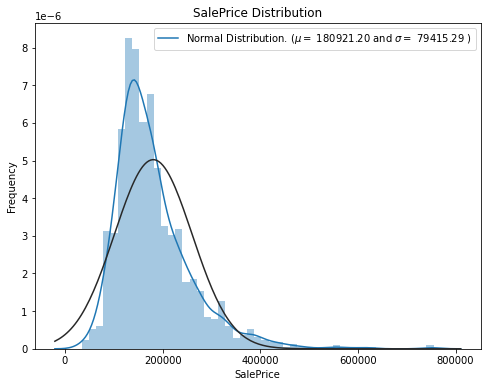

In [ ]:
plt.subplots(figsize=(8,6))
sns.distplot(house_data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mean, std) = norm.fit(house_data['SalePrice'])
print( '\n Mean = {:.2f} and Standard Deviation = {:.2f}\n'.format(mean, std))

# Now plotting the distribution
plt.legend(['Normal Distribution. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mean, std)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')
plt.show()

From the above graph, we can see that the SalePrice Variable is right-skewed.

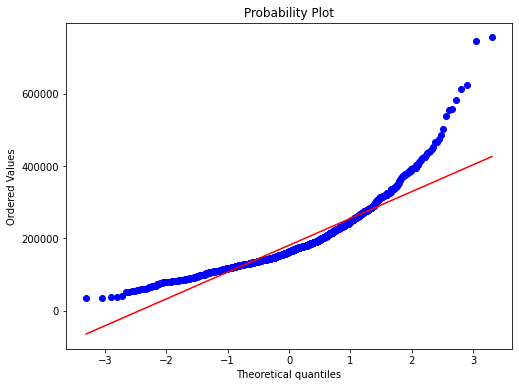

In [ ]:
fig = plt.figure(figsize=(8,6))
res = stats.probplot(house_data['SalePrice'], plot=plt)
plt.show()

### Relationship with Numerical Variables

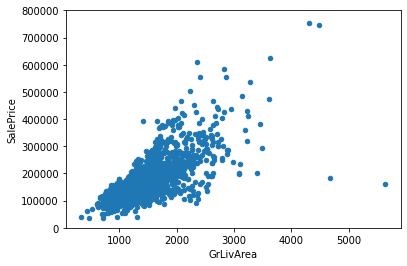

In [ ]:
var = 'GrLivArea'
data = pd.concat([house_data['SalePrice'], house_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Here we can see that SalePrice and GrLivArea have linear relationship

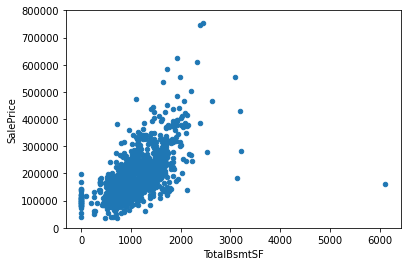

In [ ]:
var = 'TotalBsmtSF'
data = pd.concat([house_data['SalePrice'], house_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Here TotalBsmtSF and SalePrice also have linear relationship but slope in this case is much higher than the previous case.

### Relationship with Categorical Variables

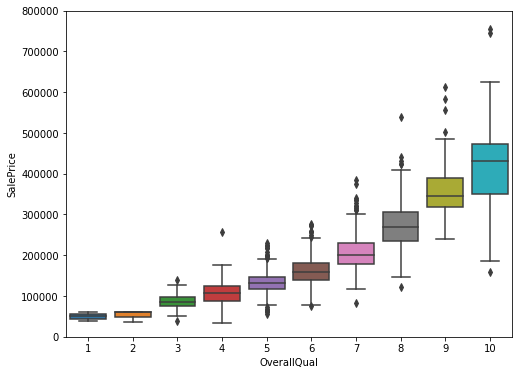

In [ ]:
var = 'OverallQual'
data = pd.concat([house_data['SalePrice'], house_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

The box plot above shows how sales prices increase with the overall quality.

Transforming some numerical variables that are really categorical

In [ ]:
# MSSubClass=The building class
house_data['MSSubClass'] = house_data['MSSubClass'].apply(str)
test_df['MSSubClass'] = test_df['MSSubClass'].apply(str)


# Changing OverallCond into a categorical variable
house_data['OverallCond'] = house_data['OverallCond'].astype(str)
test_df['OverallCond'] = test_df['OverallCond'].astype(str)


# Year and month sold are transformed into categorical features.
test_df['YrSold'] = test_df['YrSold'].astype(str)
test_df['MoSold'] = test_df['MoSold'].astype(str)

test_df['YrSold'] = test_df['YrSold'].astype(str)
test_df['MoSold'] = test_df['MoSold'].astype(str)

## Converting Categorical Columns to Numerical

Merging train and test data

In [ ]:
all_data = pd.concat([house_data, test_df], axis=0 )

In [ ]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,20,FV,62.0,1936,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,6,2006,WD,Normal,NaN
1455,2916,60,RL,62.0,1894,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,85.0,20000,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,9,2006,WD,Abnorml,NaN
1457,2918,70,RL,66.0,10441,Pave,None,Reg,Lvl,Inside,...,0,None,MnPrv,Shed,700,7,2006,WD,Normal,NaN


Label Encoding some categorical variables that may contain information in their ordering set

In [ ]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 80)


Since area related features are very important to determine house prices, adding one more feature which is the total area of basement, first and second floor areas of each house

In [ ]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

Here dummy columns are created for each categorical column wrt its values

In [ ]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 223)


Train and test data are divided in the following cell.

In [ ]:
house_data = all_data[:house_data.shape[0]]
test_df = all_data[house_data.shape[0]:]
test_df = test_df.drop(columns='SalePrice')

In [ ]:
print(house_data.shape)

(1460, 223)


In [ ]:
print(test_df.shape)

(1459, 222)


Now there are 302 columns in training set.

In [ ]:
house_data

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,9,65.0,8450,1,1,3,0,7,4,...,0,0,0,1,0,0,0,0,1,0
1,2,4,80.0,9600,1,1,3,0,6,7,...,0,0,0,1,0,0,0,0,1,0
2,3,9,68.0,11250,1,1,0,0,7,4,...,0,0,0,1,0,0,0,0,1,0
3,4,10,60.0,9550,1,1,0,0,7,4,...,0,0,0,1,1,0,0,0,0,0
4,5,9,84.0,14260,1,1,0,0,8,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,9,62.0,7917,1,1,3,0,6,4,...,0,0,0,1,0,0,0,0,1,0
1456,1457,4,85.0,13175,1,1,3,0,6,5,...,0,0,0,1,0,0,0,0,1,0
1457,1458,10,66.0,9042,1,1,3,0,7,8,...,0,0,0,1,0,0,0,0,1,0
1458,1459,4,68.0,9717,1,1,3,0,5,5,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 223 entries, Id to SaleCondition_Partial
dtypes: float64(13), int64(48), uint8(162)
memory usage: 938.2 KB


In [ ]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,6.214384,70.199658,10516.828082,0.995890,0.993836,1.942466,0.062329,6.099315,4.575342,...,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,3.543318,22.431902,9981.264932,0.063996,0.249667,1.409156,0.276232,1.382997,1.112799,...,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,4.000000,60.000000,7553.500000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,5.000000,70.000000,9478.500000,1.000000,1.000000,3.000000,0.000000,6.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,9.000000,80.000000,11601.500000,1.000000,1.000000,3.000000,0.000000,7.000000,5.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,14.000000,313.000000,215245.000000,1.000000,2.000000,3.000000,2.000000,10.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
correlation_data = house_data.corr()
correlation_values = correlation_data['SalePrice'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
print("Correlation of Features wrt SalePrice")
correlation_df = abs(correlation_values).sort_values(ascending=False)
for i in correlation_df.index:
    print(i,": ", correlation_df[i])

Correlation of Features wrt SalePrice
SalePrice :  1.0
OverallQual :  0.7909816005838053
TotalSF :  0.7822600527979827
GrLivArea :  0.7086244776126515
GarageCars :  0.6404091972583519
ExterQual :  0.6368836943991116
GarageArea :  0.6234314389183622
TotalBsmtSF :  0.6135805515591943
1stFlrSF :  0.6058521846919153
BsmtQual :  0.593733919103818
KitchenQual :  0.589188778299423
FullBath :  0.5606637627484453
TotRmsAbvGrd :  0.5337231555820284
YearBuilt :  0.5228973328794967
YearRemodAdd :  0.5071009671113866
Foundation_PConc :  0.4977337525869374
MasVnrArea :  0.4726144990045735
Fireplaces :  0.46692883675152763
GarageFinish :  0.4256842542080416
Neighborhood_NridgHt :  0.4021485981752677
HeatingQC :  0.400177543162901
BsmtFinSF1 :  0.3864198062421535
MasVnrType_None :  0.36745636519324876
SaleType_New :  0.35750940508319323
GarageType_Detchd :  0.3541407884127035
SaleCondition_Partial :  0.3520598546714349
LotFrontage :  0.34987561032244174
Foundation_CBlock :  0.3432629994446493
GarageTy

## Correlation Matrix

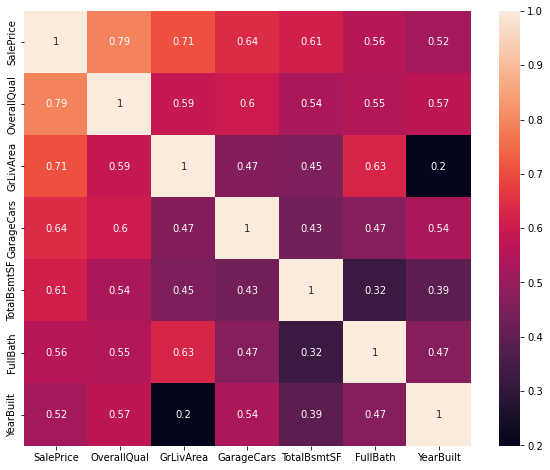

In [ ]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
plt.subplots(figsize=(10,8))
sns.heatmap(house_data[cols].corr(), annot=True)
plt.show()

## Scatterplot Matrix

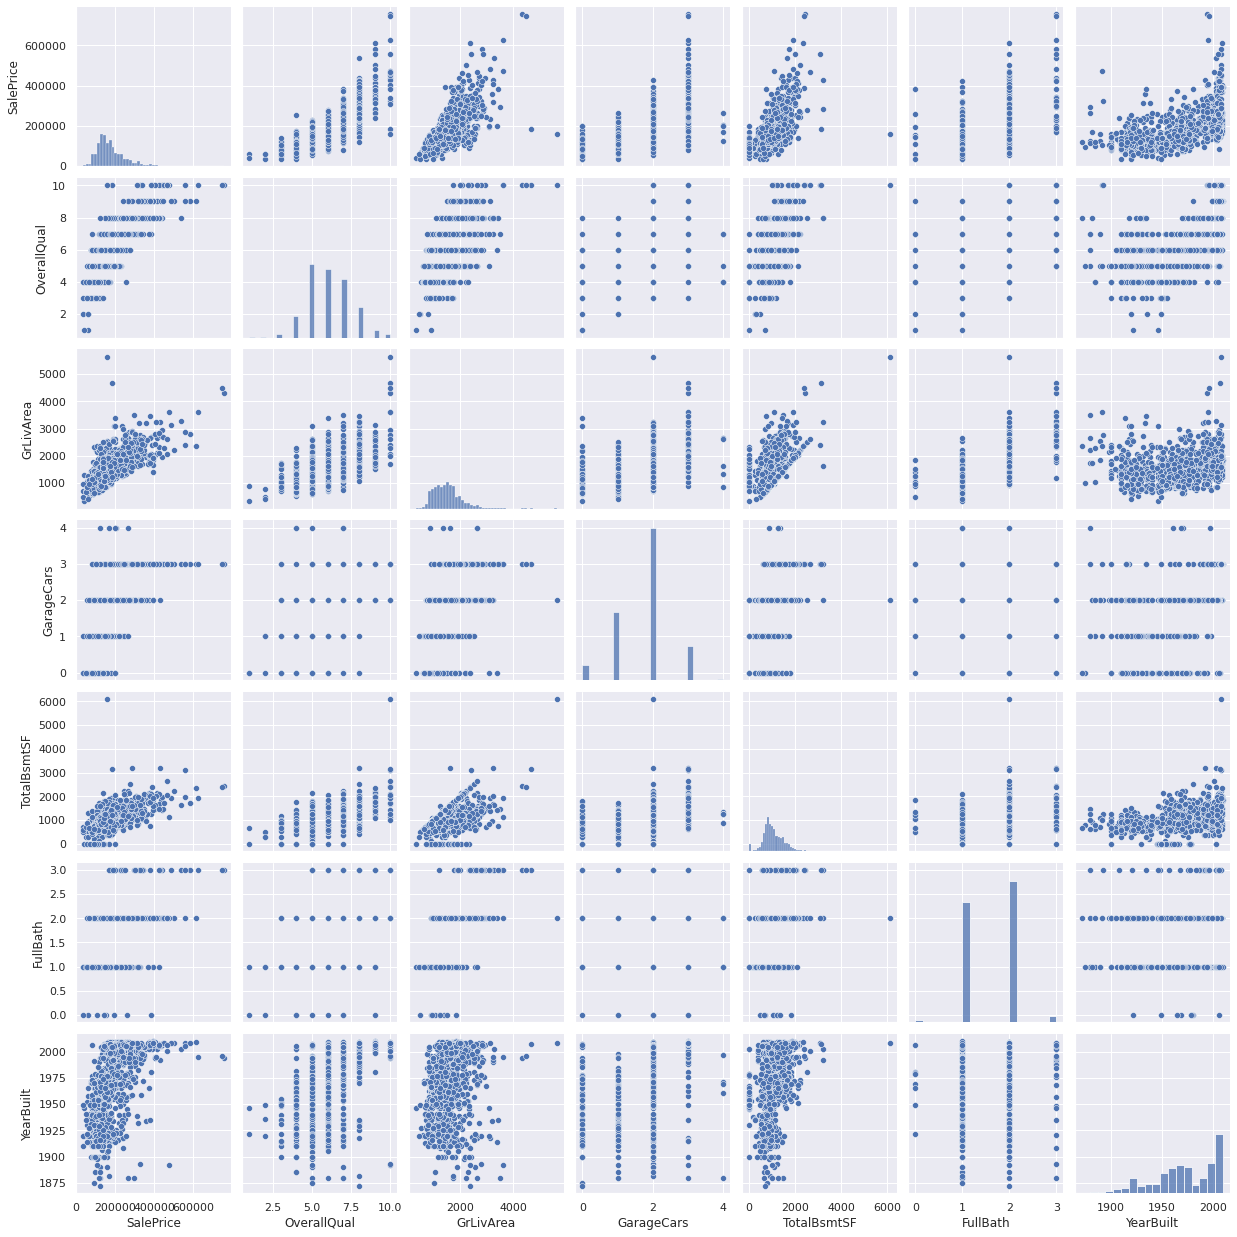

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house_data[cols], size = 2.5)
plt.show();

From the above scatterplot, we can see that GrLivArea, TotalBsmtSf have linear relation with SalePrice

The numerical variables such as SalePrice, GrLivArea, TotalBsmtSF are right skewed.

## Data Partition (80% for training and 20% for testing) (Use scikit-learn)

In [ ]:
# Independent attributes
X = house_data.drop(columns=['SalePrice', 'Id'])

# Dependent attributes
Y = house_data[['SalePrice']]

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=45)

# # # Scaling using standard scalar
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test= scaler.transform(X_test)
# final_test_df = scaler.transform(test_df.drop(columns='Id'))

## Building Model

In [ ]:
# Create linear regression object
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

## Summarize the model.

In [ ]:
regression_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

## Prediction

In [ ]:
y_train_pred = regression_model.predict(X_train)

In [ ]:
y_test_pred = regression_model.predict(X_test)

## Evaluate the model

In [ ]:
linear_regression_score = regression_model.score(X_test, y_test)
print("Score of Linear Regression Model: ", round(linear_regression_score, 5))

Score of Linear Regression Model:  0.90473


In [ ]:
print("Mean squared error: ", round(mean_squared_error(y_test, y_test_pred), 5))

Mean squared error:  616437246.61255


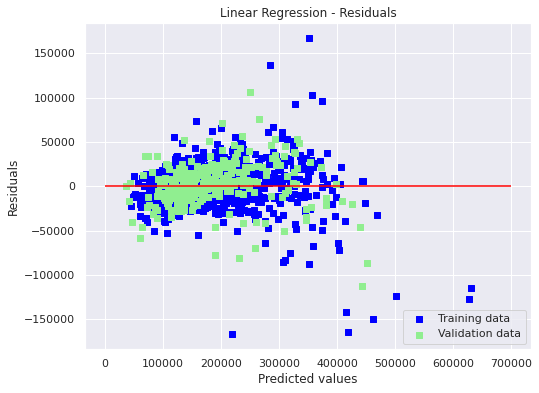

In [ ]:
# Plot residuals
plt.subplots(figsize=(8,6))
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear Regression - Residuals")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "lower right")
plt.hlines(y = 0, xmin = 0, xmax = 700000, color = "red")
plt.show()

The above plot shows the residual error for training and validation data

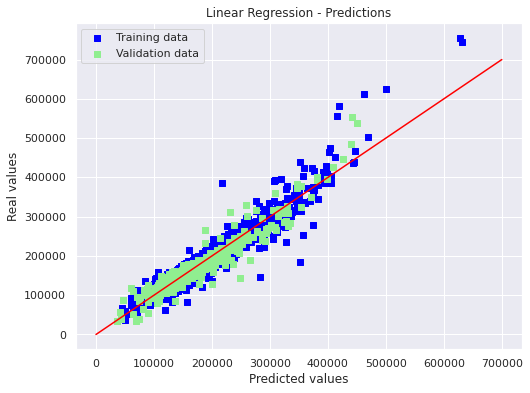

In [ ]:
# Plot predictions
plt.subplots(figsize=(8,6))
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear Regression - Predictions")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0,700000], [0, 700000], c = "red")
plt.show()

The above plot shows the predicted and actual values for training and validation data.

## Random Forest Regressor

In [ ]:
random_forest_regressor =  RandomForestRegressor(n_estimators = 29, random_state = 78)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=29, random_state=78)

In [ ]:
y_pred_rf = random_forest_regressor.predict(X_test)

In [ ]:
rf_score = random_forest_regressor.score(X_test, y_test)
print("Score of Random Forest Regressor Model: ", round(rf_score, 5))

Score of Random Forest Regressor Model:  0.90407


In [ ]:
print("Mean squared error: ", round(mean_squared_error(y_test, y_pred_rf), 5))

Mean squared error:  620713403.61274


## K Neighbors Regressor

In [ ]:
k_neighbors_regressor = KNeighborsRegressor()
k_neighbors_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred_kn = k_neighbors_regressor.predict(X_test)

In [ ]:
kn_score = k_neighbors_regressor.score(X_test, y_test)
print("Score of Random Forest Regressor Model: ", round(kn_score, 5))

Score of Random Forest Regressor Model:  0.71558


In [ ]:
print("Mean squared error: ", round(mean_squared_error(y_test, y_pred_kn), 5))

Mean squared error:  1840270760.38753


## Comparison of Results

In [ ]:
results_table = PrettyTable(['Model','Score', 'Mean Squared Error (MSE)'])
results_table.add_row(['Linear Regression', round(linear_regression_score, 5), round(mean_squared_error(y_test, y_test_pred), 5)])
results_table.add_row(['Random Forest Regressor', round(rf_score, 5), round(mean_squared_error(y_test, y_pred_rf), 5) ])
results_table.add_row(['K Neighbors Regressor', round(kn_score,5), round(mean_squared_error(y_test, y_pred_kn),5)])
print(results_table)

+-------------------------+---------+--------------------------+
|          Model          |  Score  | Mean Squared Error (MSE) |
+-------------------------+---------+--------------------------+
|    Linear Regression    | 0.90473 |     616437246.61255      |
| Random Forest Regressor | 0.90407 |     620713403.61274      |
|  K Neighbors Regressor  | 0.71558 |     1840270760.38753     |
+-------------------------+---------+--------------------------+


The above results show that Linear Regression outperformed other models with the score of 0.90473

# Submission

In [ ]:
# Independent attributes
X_train_final = house_data.drop(columns=['SalePrice', 'Id'])

# Dependent attributes
Y_train_final = house_data[['SalePrice']]

In [ ]:
# # Scaling using standard scalar
# final_scaler = StandardScaler()
# X_train_final = final_scaler.fit_transform(X_train_final)
# final_test_df = final_scaler.transform(test_df.drop(columns='Id'))
final_test_df = test_df.drop(columns=['Id'])

In [ ]:
final_random_forest_regressor = RandomForestRegressor(n_estimators = 60, random_state = 0)
final_random_forest_regressor.fit(X_train_final, Y_train_final)

RandomForestRegressor(n_estimators=60, random_state=0)

In [ ]:
test_pred = final_random_forest_regressor.predict(final_test_df)

In [ ]:
test_pred.shape

(1459,)

In [ ]:
submission_df = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_pred})

In [ ]:
submission_df.to_csv("submission.csv", index=False)

# Inference

1. The baseline model for linear regression and its score is 0.8533. In this baseline model, no data pre-processing was performed and hence the regression score here is less.
2. The linear regression model trained on preprocessed dataset achieved the regression score of 0.90473.
3. The increase in regression score suggests that preprocessing techniques such as filling the missing values by referring the data description, conversion of categorical columns to numerical helps in enhancing the performance of regression model.
4. Random forest regressor model achieved a score of 0.90407 and the score of K Neighbours model was the least among the three models i.e. 0.71558.
5. The analysis of this dataset suggests that GrLivArea(Above gradeliving area square feet) and TotalBsmtSF(Total square feet of basement area) features have linear relationship with the sale price of the house and have a greater impact on the price.
6. My current rank at the competition is 1887 with score of 0.14599
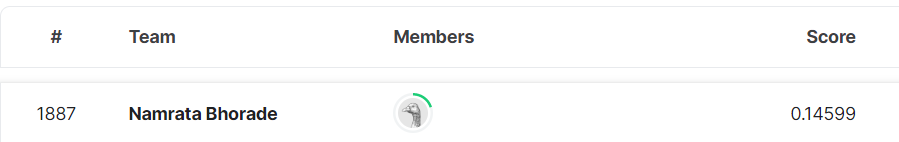

The link for my kaggle profile - https://www.kaggle.com/namratabhorade/competitions